# Lab No 4

# Submitted By- Atul Kumar

# Dataset- Fish market. Database of common fish species for fish market. There are total 159 number of records . This dataset is a record of 7 different fish species in fish market sales. Weight, Length1,Length2,Length3,Height and Width are the independept variables.

In [99]:
#Importing Essential libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [100]:
dataset=pd.read_csv("Fish.csv")

In [101]:
df=dataset.copy()
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Exploring the Dataset

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [103]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [104]:
#Looking for null values
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [105]:
#Calculating the total number of classes
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [106]:
#Label encoding
LE=LabelEncoder()
df["Species_Num"]=LE.fit_transform(df["Species"])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Num
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [107]:
X=df.iloc[:,1:7]
y=df[["Species","Species_Num"]]

# Splitting Dataset

In [108]:
#spliting the data for classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27,stratify=y)

# Random Forest Model

              precision    recall  f1-score   support

       Bream       1.00      0.92      0.96        12
      Parkki       1.00      1.00      1.00         4
       Perch       0.71      0.67      0.69        18
        Pike       1.00      1.00      1.00         6
       Roach       0.43      0.50      0.46         6
       Smelt       0.71      1.00      0.83         5
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.77        53
   macro avg       0.69      0.73      0.71        53
weighted avg       0.77      0.77      0.77        53



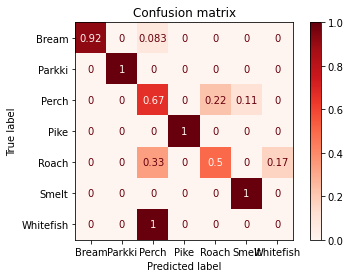

In [109]:
RC=RandomForestClassifier()

RC.fit(X_train,y_train["Species"])
y_pred=RC.predict(X_test)

print(classification_report(y_test["Species"],y_pred))
con_mat=plot_confusion_matrix(RC, X_test, y_test["Species"],
                                 cmap=plt.cm.Reds,
                                 normalize="true")
plt.title('Confusion matrix')
plt.show(con_mat)

# Saving The Model

In [110]:
#saving the model
pickle_out=open("classifier.pkl","wb")
pickle.dump(RC,pickle_out)
pickle_out.close()

# Predictions

In [111]:
#Prediction1
RC.predict([[242.0,23.2,25.4,30.0,11.5200,4.0200]])

array(['Bream'], dtype=object)

In [112]:
#Prediction2
RC.predict([[110,19,21,22.5,5.6925,3.555]])

array(['Perch'], dtype=object)

In [113]:
#Prediction3
RC.predict([[270,23.6,26,27.8,8.3804,4.2476]])

array(['Whitefish'], dtype=object)

In [114]:
#Prediction4
RC.predict([[55,13.5,14.7,16.5,6.8475,2.32]])

array(['Parkki'], dtype=object)

In [115]:
#Prediction5
RC.predict([[40,12.9,14.1,16.2,4.1472,2.268]])

array(['Perch'], dtype=object)

In [116]:
#Prediction6
RC.predict([[200,30,32.3,34.8,5.568,3.3756]])

array(['Pike'], dtype=object)

In [117]:
#Prediction6
RC.predict([[6.7,9.3,9.8,10.8,1.7388,1.0476]])

array(['Smelt'], dtype=object)